In [2]:
import numpy as np
import numpy.random as random
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
def create_mixtures(A, size_Signal):
    x = np.arange(size_Signal)
    a = np.sin(4*x+np.cos(x))
    b = np.sin(2*x+np.pi/2)
    c = np.sin(3*x-np.pi/3)+np.cos(1.5*x-2*np.pi/5)
    d = np.sin(3*x)*np.sin(2*x)
    
    sources = np.array([a,b,c,d])
    return np.dot(A,sources), sources

def g(y):
    return np.multiply(np.power(y,2),np.sign(y))
    #return np.tanh(10*y)

def f(y):
    return np.power(y,3)

def NPCA_RLS(mixtures, runs = 5):
    P = np.identity(mixtures.shape[0])
    W = np.identity(mixtures.shape[0])
    dW = W
    y = np.zeros(mixtures.shape)
    beta = 0.9
    whitenedMixtures = whiten(mixtures)
    
    for j in np.arange(runs):
        for i in np.arange(whitenedMixtures.shape[1]):
            y[:,i] = np.dot(W, whitenedMixtures[:,i])
            z = np.reshape(g(y[:,i]), (mixtures.shape[0], 1))
            h = np.dot(P,z)
            m = h/(beta + np.dot(np.transpose(z),h))

            Triangle = P - np.dot(m, np.transpose(h))
            lowerIndices = np.tril_indices(whitenedMixtures.shape[0])
            Triangle[lowerIndices] = Triangle.T[lowerIndices]

            P = (1/beta) * Triangle
            e =  np.reshape(whitenedMixtures[:,i], (whitenedMixtures.shape[0], 1)) - np.dot(np.transpose(W),z)
            
            dW = np.dot(m,np.transpose(e))
            
            W = W + dW
            if (np.isnan(W).any() == True):
                print('Lost convergence at iterator %d'%i)
                break
            elif np.all(np.absolute(W) < 1e-6):
                print('Found convergence at iterator %d on run %d'%(i,j))
                break
    return y, W

In [19]:
number_Mixtures = 4
size_Signal = 1000
learning_rate = 1e-6

A = np.random.randint(10, size=(number_Mixtures, number_Mixtures))

mixtures, sources = create_mixtures(A,size_Signal)
print(A)

[[9 5 4 1]
 [1 8 1 8]
 [7 4 0 2]
 [2 5 6 7]]


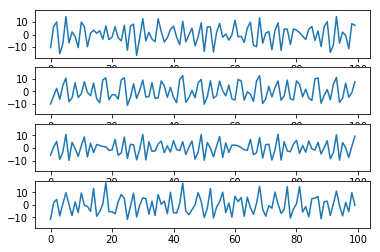

In [20]:
h, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharey=True)
ax1.plot(mixtures[0,900:])
ax2.plot(mixtures[1,900:])
ax3.plot(mixtures[2,900:])
ax4.plot(mixtures[3,900:])
plt.show()

In [21]:
[y, W] = NPCA_RLS(mixtures, learning_rate)

In [22]:
print(W)

[[-1.20563156  0.167526   -0.59640159 -0.65442738]
 [-0.30733523 -1.13738752 -0.74527364 -0.29469867]
 [ 1.21396723  0.40379485  0.95827955  0.14697525]
 [-0.26344216 -0.73409015  0.17719912 -0.931225  ]]


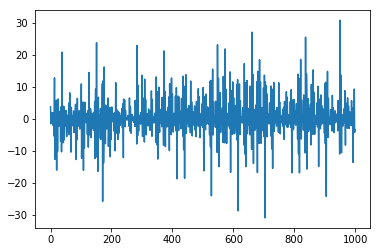

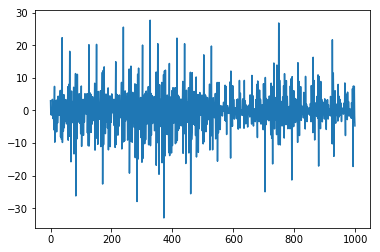

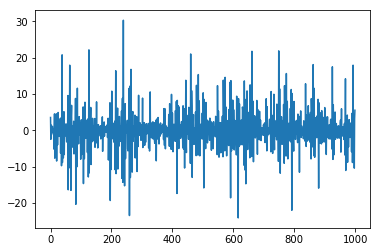

In [23]:
plt.plot(y[0])
plt.show()
plt.plot(y[1])
plt.show()
plt.plot(y[2])
plt.show()

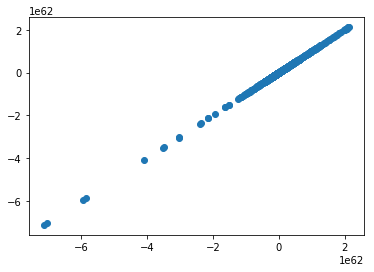

In [12]:
plt.scatter(y[1,:], y[2,:])
plt.show()